In [1]:
import pickle
# import numpy as np

### Read data from pickle file

In [21]:
# load pickled data
syntax_attention_correct = pickle.load(open("ast_attention_weights_finetuned3.pkl", "rb"))

In [22]:
syntax_list = ['else', 
            'if_statement', 
            'method_declaration', 
            'class_declaration', 
            'constructor_declaration']

In [23]:
import numpy as np
avg_attns = {}
for syntaxType in syntax_list:
    temp = []
    for instance in syntax_attention_correct:
        a = np.array(instance[syntaxType +'finetuned'])
        if a.shape[0] != 0:
            a = a.squeeze(0)
            a = a.mean(axis=2)
            temp.append(a)
    if len(temp) != 0:
        temp = np.array(temp)
        temp = temp.reshape(temp.shape[1], temp.shape[2], temp.shape[0])
        avg_temp = temp.mean(axis=2)
        avg_attns[syntaxType+"_correct"] = avg_temp

In [24]:
for key in avg_attns.keys():
    print(key)
    print(avg_attns[key].shape)

else_correct
(12, 12)
if_statement_correct
(12, 12)
method_declaration_correct
(12, 12)
class_declaration_correct
(12, 12)
constructor_declaration_correct
(12, 12)


In [26]:
syntax_attention_mis = pickle.load(open("ast_attention_weights_pretrained3.pkl", "rb"))

In [28]:
for syntaxType in syntax_list:
    temp = []
    for instance in syntax_attention_mis:
        a = np.array(instance[syntaxType +'pretrained'])
        if a.shape[0] != 0:
            a = a.squeeze(0)
            a = a.mean(axis=2)
            temp.append(a)
    if len(temp) != 0:
        temp = np.array(temp)
        temp = temp.reshape(temp.shape[1], temp.shape[2], temp.shape[0])
        avg_temp = temp.mean(axis=2)
        avg_attns[syntaxType+"_mispred"] = avg_temp

In [31]:
avg_attns.keys()

dict_keys(['else_correct', 'if_statement_correct', 'method_declaration_correct', 'class_declaration_correct', 'constructor_declaration_correct', 'else_mispred', 'if_statement_mispred', 'method_declaration_mispred', 'class_declaration_mispred', 'constructor_declaration_mispred'])

In [33]:
import sklearn
from matplotlib import cm
from sklearn import manifold
import seaborn as sns

sns.set_style("darkgrid")
BLACK = "k"
GREEN = "#59d98e"
SEA = "#159d82"
BLUE = "#3498db"
PURPLE = "#9b59b6"
GREY = "#95a5a6"
RED = "#e74c3c"
ORANGE = "#f39c12"
YELLOW = "#f1c40f"
GRAY = "#95a5a6"
BROWN = "#8e44ad"
CYAN = "#8e44ad"

In [34]:
def get_data_points(head_data):
  xs, ys, avgs = [], [], []
  for layer in range(12):
    for head in range(12):
      ys.append(head_data[layer][head])
      xs.append(1 + layer)
    avgs.append(head_data[layer].mean())
  return xs, ys, avgs

def add_line(key, ax, color, label, plot_avgs=True):
  xs, ys, avgs = get_data_points(avg_attns[key])
  ax.scatter(xs, ys, s=12, label=label, color=color)
  if plot_avgs:
    ax.plot(1 + np.arange(len(avgs)), avgs, color=color)
  ax.legend(loc="best")
  ax.set_xlabel("Layer")
  ax.set_ylabel("Avg. Attention")

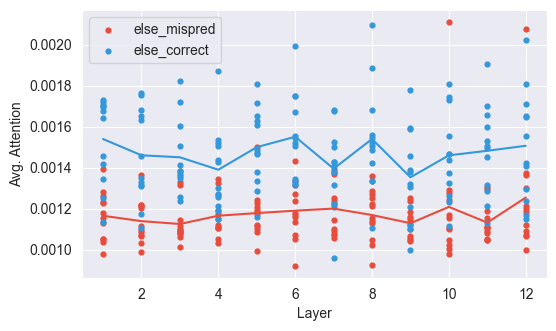

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 16))
ax = plt.subplot(4, 1, 1)
for key, color, label in [ ("else_correct", RED, "else_mispred"),("else_mispred", BLUE, "else_correct")]:
  add_line(key, ax, color, label)

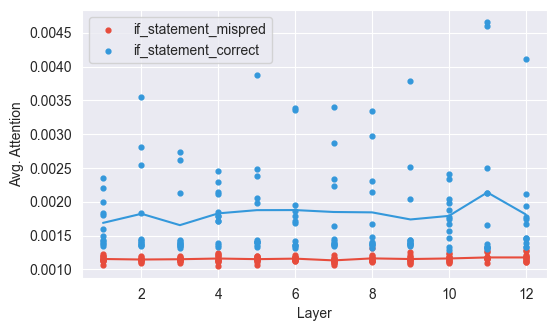

In [51]:
plt.figure(figsize=(6, 16))
ax = plt.subplot(4, 1, 1)
for key, color, label in [ ("if_statement_correct", RED, "if_statement_mispred"),("if_statement_mispred", BLUE, "if_statement_correct")]:
  add_line(key, ax, color, label)

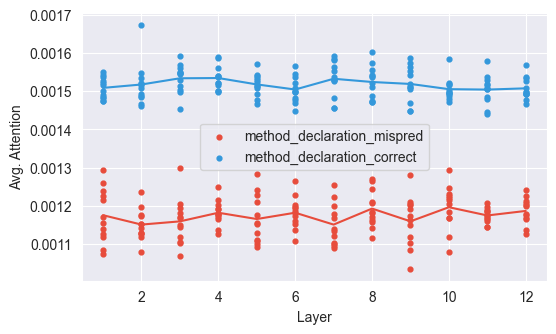

In [50]:
plt.figure(figsize=(6, 16))
ax = plt.subplot(4, 1, 1)
for key, color, label in [ ("method_declaration_correct", RED, "method_declaration_mispred"),("method_declaration_mispred", BLUE, "method_declaration_correct")]:
  add_line(key, ax, color, label)

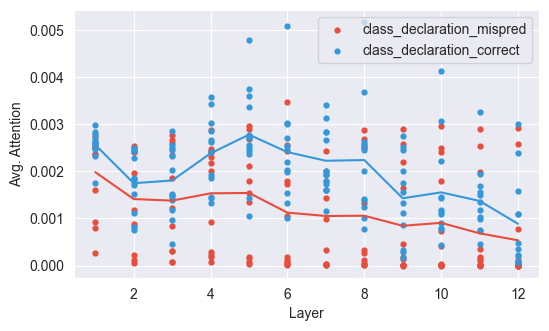

In [49]:
plt.figure(figsize=(6, 16))
ax = plt.subplot(4, 1, 1)
for key, color, label in [ ("class_declaration_correct", RED, "class_declaration_mispred"),("class_declaration_mispred", BLUE, "class_declaration_correct")]:
  add_line(key, ax, color, label)

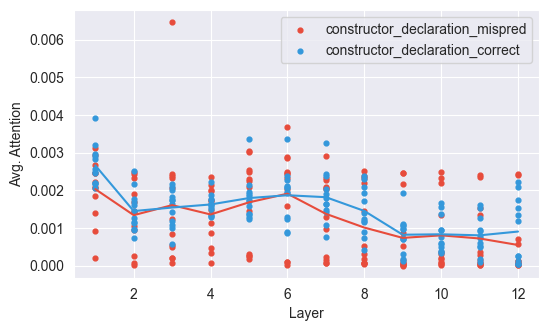

In [47]:
plt.figure(figsize=(6, 16))
ax = plt.subplot(4, 1, 1)
for key, color, label in [ ("constructor_declaration_correct", RED, "constructor_declaration_mispred"),("constructor_declaration_mispred", BLUE, "constructor_declaration_correct")]:
  add_line(key, ax, color, label)